<Figure size 432x288 with 0 Axes>

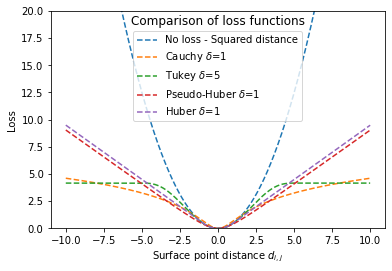

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

b=1

def NoLoss(x,b):
    return x*x/2
def Huber(x,b):
    if (np.fabs(x)<=b): return 1/2.0*x*x
    else: return b*(np.fabs(x)-b/2.0)
def Cauchy(x,b):
    return np.log(1+np.square(x/b))
def SoftL1(x,b):
    return b*b*(np.sqrt(1+np.square(x/b))-1) # squared or not loss?
    #return b*(np.sqrt(1+np.square(x/b))-1)
def Turkey(x,b):
    if(np.fabs(x)<=b): return b*b / 6 * (1 - (np.power(1 - np.power(x / b,2),3)))
    else: return b*b / 6
    
    


x = np.arange(-10, 10, 0.01)

y_none = []
for i in range(len(x)):
   y_none.append(NoLoss(x[i],b))
y_huber = []
for i in range(len(x)):
   y_huber.append(Huber(x[i],b))

y_cauchy = []
for i in range(len(x)):
   y_cauchy.append(Cauchy(x[i],b))

y_softl1 = []
for i in range(len(x)):
   y_softl1.append(SoftL1(x[i],b))

y_tukey = []
for i in range(len(x)):
   y_tukey.append(Turkey(x[i],5))


y_combined = []
for i in range(len(x)):
   y_combined.append(Huber(Cauchy(x[i],0.01),0.1))

plt.figure()
fig, ax = plt.subplots()

plt.plot(x, y_none, '--',   label='No loss - Squared distance')
plt.plot(x, y_cauchy, '--', label='Cauchy $\delta$=1')
plt.plot(x, y_tukey, '--',  label='Tukey $\delta$=5')
plt.plot(x, y_softl1, '--', label='Pseudo-Huber $\delta$=1')
plt.plot(x, y_huber, '--',  label='Huber $\delta$=1')



#plt.plot(x, y_combined, 'y-')
leg = ax.legend(loc='center',bbox_to_anchor=(0.5, 0, 0.0, 1.4));
#ax.set_title('Residuals scaled by loss function',fontsize=10,loc='center')


#ax.set_xlabel(')
ax.set_ylabel('Loss')
plt.ylim(0,20)
#plt.axis('equal')
#ax.xaxis.set_label_position('top')
ax.set_xlabel('Surface point distance $d_{i,j}$')
ax.set_title('Comparison of loss functions', y=1.0, pad=-14)
plt.savefig('./output/robust_loss.pdf')
plt.savefig('./output/robust_loss.pdf')

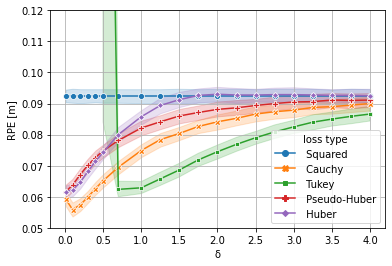

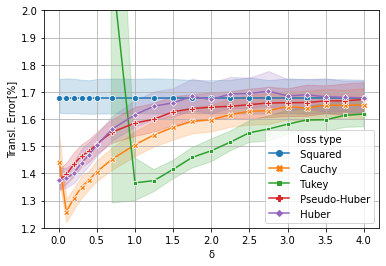

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas.api.types import CategoricalDtype

x=str(u'\u03B4')


dg = pd.read_csv('./data/loss_function-cfear-3_2022-04-08_1208_eval.csv', sep=r',', header=0)

#dg = dg.rename(columns={'Transl.Error': 'Transl. Error[%]'})
dg = dg.rename(columns={'resolution r': 'resolution r [m]'})
dg = dg.rename(columns={'Trans.err.(%)': 'Transl. Error[%]'})
dg = dg.rename(columns={'RPE(m)': 'RPE [m]'})
dg = dg.rename(columns={'loss limit': x})
dd=dg[dg["loss type"]=='"None"']
#dg.loc[dg["loss type"] == " SoftLOne"," SoftLOne"] = " Peudo-Huber"
dg = dg.replace([' SoftLOne'],[' Pseudo-Huber'])
dg = dg.replace([' None'],[' Squared'])



cat_size_order = CategoricalDtype(
    [' Squared',' Cauchy', ' Tukey', ' Pseudo-Huber', ' Huber'], 
    ordered=True
)
dg['loss type'] = dg["loss type"].astype(cat_size_order)
dg=dg.sort_values('loss type')

##############################


#print(dg.columns)
plt.figure(1)
plt.grid()  #just add this
ax1=sns.lineplot(data=dg, x=x, y="RPE [m]", hue="loss type",style="loss type",markers=True, dashes=False) 
plt.ylim(0.05,0.12)
fig = ax1.get_figure()
fig.savefig('./output/loss_error_rpe.pdf', format='pdf')
fig.savefig('./output/loss_error_rpe.png', format='png', dpi=200)



plt.figure(2)
plt.grid()  #just add this
ax1=sns.lineplot(data=dg, x=x, y="Transl. Error[%]", hue="loss type",style="loss type",markers=True, dashes=False) 
plt.ylim(1.2,2.0)
fig = ax1.get_figure()
fig.savefig('./output/loss_error_odom_error.pdf', format='pdf')
fig.savefig('./output/loss_error_odom_error.png', format='png', dpi=200)





In [8]:

x=str(u'\u03B4')
print(x)

df=dg[dg[x]==0.1]
print("##################### Translation error ########################")
loss_type=' Squared'
dd=df[df["loss type"]==loss_type]
none_rpe=dd["Transl. Error[%]"].mean()
print(loss_type+": "+"{:1.2f}".format(none_rpe) )

loss_type=' Pseudo-Huber'
dd=df[df["loss type"]==loss_type]
pseudoH_rpe=dd["Transl. Error[%]"].mean()
diff=(pseudoH_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(pseudoH_rpe) + " ({:1.1f})".format((100*diff)) +"%" )

loss_type=' Huber'
dd=df[df["loss type"]==loss_type]
huber_rpe=dd["Transl. Error[%]"].mean()
diff=(huber_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(huber_rpe) + " ({:1.1f})".format((100*diff)) +"%" )

loss_type=' Cauchy'
dd=df[df["loss type"]==loss_type]
cauchy_rpe=dd["Transl. Error[%]"].mean()
diff=(cauchy_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(cauchy_rpe) + " ({:1.1f})".format((100*diff)) +"%" )

loss_type=' Tukey'
df=dg[dg[x]==1]
dd=df[df["loss type"]==loss_type]
tukey_rpe=dd["Transl. Error[%]"].mean()
diff=(tukey_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(tukey_rpe) + " ({:1.1f})".format((100*diff)) +"%" )
print("#####################  Translation error ########################")

δ
##################### Translation error ########################
 Squared: 1.68
 Pseudo-Huber: 1.40 (-16.7)%
 Huber: 1.38 (-17.6)%
 Cauchy: 1.26 (-24.9)%
 Tukey: 1.37 (-18.5)%
#####################  Translation error ########################


In [10]:
df=dg[dg[x]==0.1]
print("##################### RPE [m] ########################")
loss_type=' Squared'
dd=df[df["loss type"]==loss_type]
none_rpe=dd["RPE [m]"].mean()*100
print(loss_type+": "+"{:1.2f}".format(none_rpe) )

loss_type=' Pseudo-Huber'
dd=df[df["loss type"]==loss_type]
pseudoH_rpe=dd["RPE [m]"].mean()*100
diff=(pseudoH_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(pseudoH_rpe) + " ({:1.1f})".format(100*(diff)) +"%" )

loss_type=' Huber'
dd=df[df["loss type"]==loss_type]
huber_rpe=dd["RPE [m]"].mean()*100
diff=(huber_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(huber_rpe) + " ({:1.1f})".format(100*(diff)) +"%" )

loss_type=' Cauchy'
dd=df[df["loss type"]==loss_type]
cauchy_rpe=dd["RPE [m]"].mean()*100
diff=(cauchy_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(cauchy_rpe) + " ({:1.1f})".format(100*(diff)) +"%" )

df=dg[dg[x]==1]
loss_type=' Tukey'
dd=df[df["loss type"]==loss_type]
tukey_rpe=dd["RPE [m]"].mean()*100
diff=(tukey_rpe-none_rpe)/none_rpe
print(loss_type+": "+"{:1.2f}".format(tukey_rpe) + " ({:1.1f})".format(100*(diff)) +"%" )
print("##################### RPE [m] ########################")

##################### RPE [m] ########################
 Squared: 9.25
 Pseudo-Huber: 6.38 (-31.1)%
 Huber: 6.22 (-32.7)%
 Cauchy: 5.59 (-39.6)%
 Tukey: 6.29 (-32.0)%
##################### RPE [m] ########################
